In [43]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy  import control as ctrl

#Inserção dos antecedentes e Consequentes
#Mínimo de 2m³ e máximo de 100m³
#Mínimo de 0 pessoas e máximo de 100 pessoas 
TamanhoSala = ctrl.Antecedent(np.arange(2,100,1), 'Tamanho da Sala')    # Em metros cúbicos
Qpessoas =   ctrl.Antecedent(np.arange(0,100,1), 'Pessoas')
IndiceDePotencia = ctrl.Consequent(np.arange(1,11,0.5), 'Potencia')



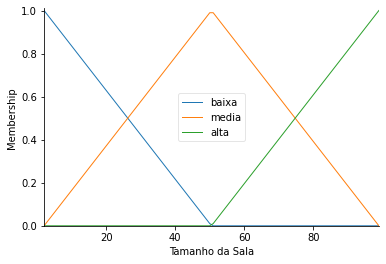

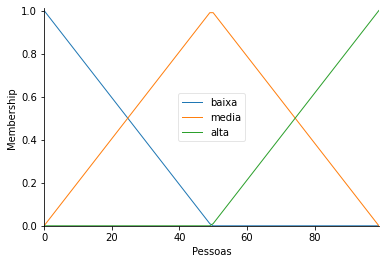

In [ ]:
# Aqui usamos a conveniência `automf` para preencher as variáveis ​​fuzzy com 
# termos.
TamanhoSala.automf(number=3, names=['baixa','media','alta'])
Qpessoas.automf(number=3, names=['baixa','media','alta'])

TamanhoSala.view()
Qpessoas.view()

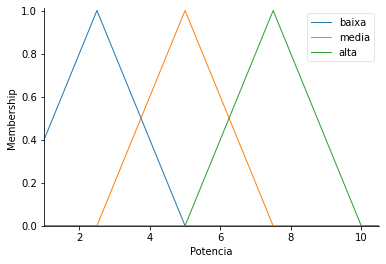

In [ ]:
# Classificações,
# Gerando funções de pertinência para Pontecia 
IndiceDePotencia['baixa'] = fuzz.trimf(IndiceDePotencia.universe, [0, 2.5, 5])
IndiceDePotencia['media'] = fuzz.trimf(IndiceDePotencia.universe, [2.5, 5, 7.5])
IndiceDePotencia['alta'] = fuzz.trimf(IndiceDePotencia.universe, [5, 7.5, 10])

IndiceDePotencia.view()

In [ ]:
#Regras
regra1 = ctrl.Rule(TamanhoSala['baixa'] & Qpessoas['baixa'], IndiceDePotencia['baixa'])
regra2 = ctrl.Rule(TamanhoSala['baixa'] & Qpessoas['media'], IndiceDePotencia['alta'])
regra3 = ctrl.Rule(TamanhoSala['media'] & Qpessoas['baixa'], IndiceDePotencia['baixa'])
regra4 = ctrl.Rule(TamanhoSala['media'] & Qpessoas['media'], IndiceDePotencia['media'])
regra5 = ctrl.Rule(TamanhoSala['media'] & Qpessoas['alta'], IndiceDePotencia['alta'])
regra6 = ctrl.Rule(TamanhoSala['alta'] & Qpessoas['media'], IndiceDePotencia['media'])
regra7 = ctrl.Rule(TamanhoSala['alta']  & Qpessoas['alta'], IndiceDePotencia['alta'])
regra8 = ctrl.Rule(TamanhoSala['baixa']  & Qpessoas['alta'], IndiceDePotencia['alta'])
regra9 = ctrl.Rule(TamanhoSala['alta']  & Qpessoas['baixa'], IndiceDePotencia['baixa'])

6.301367535887199


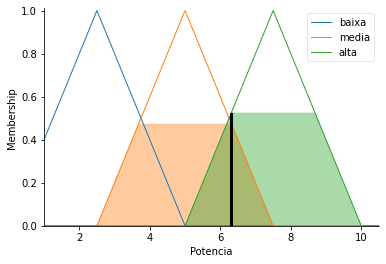

In [45]:

valorIndiceDePontencia = ctrl.ControlSystem([regra1,regra2,regra3,regra4,regra5,regra6,regra7,regra8
                                             ,regra9])

ajuste = ctrl.ControlSystemSimulation(valorIndiceDePontencia)

ajuste.input['Tamanho da Sala'] = 25
ajuste.input['Pessoas'] = 50
ajuste.compute()

print(ajuste.output['Potencia'])
IndiceDePotencia.view(sim = ajuste)